In [89]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols

import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

In [91]:
house = pd.read_csv('house_prices.csv')

house.head()

Rooms  Distance  Value
0  6.575    4.0900   24.0
1  6.421    4.9671   21.6
2  7.185    4.9671   34.7
3  6.998    6.0622   33.4
4  7.147    6.0622   36.2

In [92]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     506 non-null    float64
 1   Distance  506 non-null    float64
 2   Value     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [93]:
house.corr()['Value']

Rooms       0.695360
Distance    0.249929
Value       1.000000
Name: Value, dtype: float64

Text(0, 0.5, 'value')

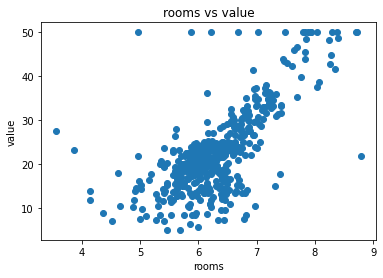

In [94]:
plt.scatter(house['Rooms'],house['Value'])
plt.title('rooms vs value')
plt.xlabel('rooms')
plt.ylabel('value')

Text(0, 0.5, 'value')

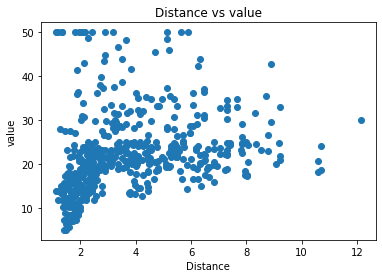

In [95]:
plt.scatter(house['Distance'],house['Value'])
plt.title('Distance vs value')
plt.xlabel('Distance')
plt.ylabel('value')

In [96]:
y = house['Value']
X = house[['Rooms', 'Distance']]

In [97]:
x_test, x_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state = 100)

In [98]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [99]:
print('Intercept:', mlr.intercept_)
print('Coeffecients:')
list(zip(X, mlr.coef_))

Intercept: -41.78566190782802
Coeffecients:


[('Rooms', 9.785545675994117), ('Distance', 0.5558704418210265)]

In [100]:
prediction = mlr.predict(x_test)

print('prediction for test data:{}'.format(prediction))

prediction for test data:[19.88028085 19.58911345 27.1989173  17.36678884 25.78259141 15.35982787
  9.06525169 14.71342135 22.99124112 27.15293316 33.98394158 14.28773138
 19.79915234 13.71463743 24.01167307 20.3851062  16.33233019 13.23169737
 21.41624678 19.8118976  16.87677611 23.13085148 19.90756062 11.82027976
  8.15455561 19.23081927 17.66866697 20.35363726 24.98553384 16.36652031
 26.29843528 24.24769331 22.44717974 38.41528889 15.25404109 17.56155543
 20.25311651 20.46553446 16.10692653 12.16905736 14.47602696 29.07410382
 27.76105969 18.81543702 19.69115815 24.36985818 16.85880399 26.96371053
 20.60558734 35.92197594 23.50492371 22.22914046 19.94445489 30.72281802
 23.39091661 18.63169092 18.58049742 14.11738151 17.73533828 30.09571435
 26.11876496 13.98837289 32.85759207 24.50519458  7.75405306 21.7380933
 22.18561496 14.91751274 25.11162084 25.42237642 19.4557887  31.06197732
 27.04379335 23.08484086 17.04975655 20.18181608 26.06190158 16.65097022
 29.83559537 22.04847174 21

In [101]:
mlr_diff = pd.DataFrame({'Actual':y_test, 'Prediction':prediction})

mlr_diff

Actual  Prediction
379    10.2   19.880281
311    22.1   19.589113
157    41.3   27.198917
244    17.6   17.366789
56     24.7   25.782591
..      ...         ...
343    23.9   26.924657
359    22.6   19.418328
323    18.5   16.694553
280    45.4   37.346950
8      16.5   16.697605

[404 rows x 2 columns]

In [102]:
new_room = 4.5
new_distance = 15.5

print('New prediction: \n', mlr.predict([[new_room, new_distance]]))

New prediction: 
 [10.86528548]


/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [103]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
pred = model.predict(sm.add_constant(x_test))
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     53.54
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.73e-16
Time:                        12:54:11   Log-Likelihood:                -340.44
No. Observations:                 102   AIC:                             686.9
Df Residuals:                      99   BIC:                             694.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.7857      6.296     -6.637      0.0

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [104]:
# R Squared
print(mlr.score(x_test, y_test)*100)

47.20143705571349


R Squared: R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 47.20, which indicates that 47.20% of the data fit the regression model.

In [105]:
# mean absolute error
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, prediction)
print('Mean absolute error:', mae)


Mean absolute error: 4.442450331760833


Mean Absolute Error: Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 4.44, which is pretty good as it is close to 0.



In [106]:
mse = metrics.mean_squared_error(y_test, prediction)
print('Mean squared error:', mse)

Mean squared error: 42.92898398310397


Mean Square Error: Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 2.636, its not great but its not bad.

In [109]:
# Multicolinearity

x_temp = sm.add_constant(x_train)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif['Features'] = x_temp.columns
print(vif.round(1))

   VIF Factor  Features
0        84.6     const
1         1.0     Rooms
2         1.0  Distance


The variance inflation factor is 1.0 which means that the variables are not correlated